# Estudo de caso 1 

Você é Analista de Dados na empresa PontoMaximo, uma rede de varejo que vende produtos eletrônicos e eletrodomésticos com lojas espalhadas por diversas cidades do Brasil. A empresa começou sua operação no Brasil em 2012 e atua nos quatro estados da região sudeste mais os estados do Paraná e Bahia.

A empresa está montando a estratégia de vendas para o próximo ano e precisa saber qual dos fabricantes dos produtos vendidos, apresenta melhor desempenho nas vendas. O objetivo é descartar os fabricantes cujos produtos possuem poucas vendas e tentar negociar melhores condições com os principais fabricantes.

Em paralelo a isso, a empresa gostaria de ter diferentes visões das vendas realizadas nos últimos 4 anos (período de 2012 a 2015). Deve ser possível segmentar os relatórios de vendas por diferentes informações e por diferentes ângulos. Estas informações irão suportar as estratégias da empresa para o próximo ano.

Sua fonte de dados é um arquivo Excel com dados coletados do sistema de vendas, CRM e ERP da empresa. O conjunto de dados foi entregue pelo departamento de TI com as seguintes colunas.

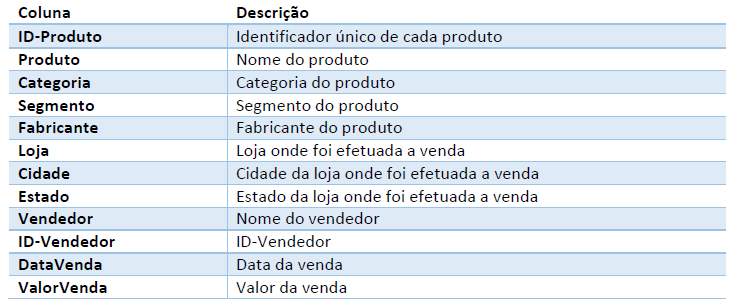

Haverá diversas reuniões para definição da estratégia de vendas e os relatórios poderão ser extraídos sob demanda, de acordo com a necessidade dos gestores. Por conta disso, você deve criar um modelo de dados que permita a extração de relatórios a qualquer momento e que permita extrair dados por diferentes visões e ângulos.

Seu trabalho é fazer isso acontecer!

In [50]:
caminho = 'C:\\Users\\FIC\\Documents\\Rafael-Dias-Python\\arquivos\\'
arquivo = 'vendas_2.xlsx'

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
dados = pd.read_excel(caminho + arquivo, sheet_name='Vendas')

In [53]:
dados.head()

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Data Venda,ValorVenda
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2012-10-04,679.00
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-01-01,832.00
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-02-02,790.00
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,2012-03-03,765.32
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,2012-04-04,459.89


In [54]:
dados.describe()

,ID-Vendedor,Data Venda,ValorVenda
count,457.000000,457,457.000000
mean,1004.091904,2014-07-15 22:09:42.932166400,790.111838
min,1001.000000,2012-01-01 00:00:00,12.000000
25%,1002.000000,2013-08-02 00:00:00,167.000000
50%,1004.000000,2014-12-04 00:00:00,671.000000
75%,1006.000000,2015-06-02 00:00:00,1230.000000
max,1009.000000,2015-12-02 00:00:00,3999.000000
std,2.456704,NaN,755.541075


In [55]:
dados.shape

(457, 12)

In [56]:
nulos = dados[dados.isnull()]
dados[nulos]


,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Data Venda,ValorVenda
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [57]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID-Produto   457 non-null    object        
 1   Produto      457 non-null    object        
 2   Categoria    457 non-null    object        
 3   Segmento     457 non-null    object        
 4   Fabricante   457 non-null    object        
 5   Loja         457 non-null    object        
 6   Cidade       457 non-null    object        
 7   Estado       457 non-null    object        
 8   Vendedor     457 non-null    object        
 9   ID-Vendedor  457 non-null    int64         
 10  Data Venda   457 non-null    datetime64[ns]
 11  ValorVenda   457 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 43.0+ KB


## Grafico de categoria x vendas (barras)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Categoria', ylabel='ValorVenda'>

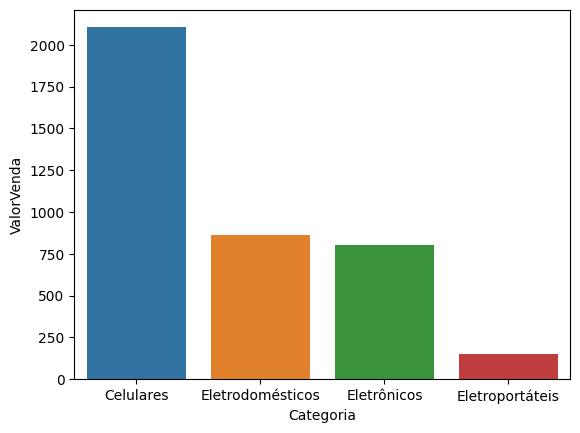

In [58]:
sns.barplot(data = dados,y="ValorVenda", x="Categoria", errorbar=None)


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, '2104.94'),
 Text(0, 0, '861.788'),
 Text(0, 0, '805.493'),
 Text(0, 0, '153.673')]

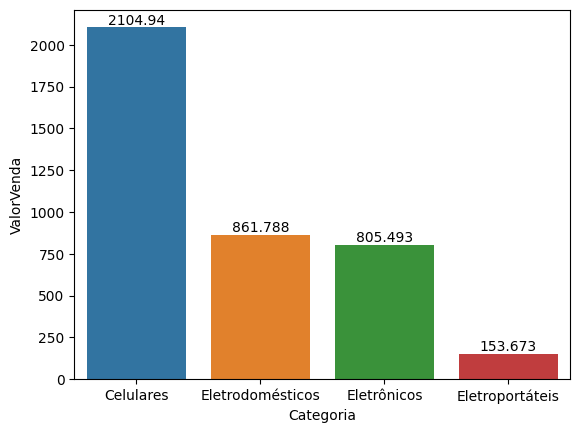

In [59]:
graficos = sns.barplot(data = dados,y="ValorVenda", x="Categoria", errorbar=None)


graficos.bar_label(graficos.containers[0])


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


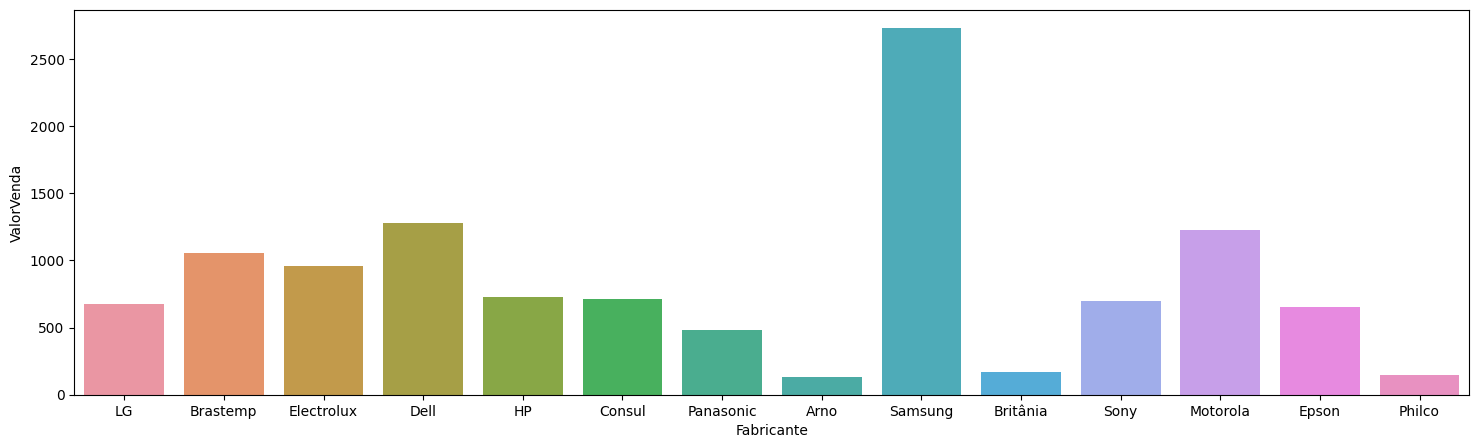

In [60]:
figura = sns.barplot(data = dados,y="ValorVenda", x="Fabricante",orient='v', errorbar=None)
figura.figure.set_size_inches(18, 5)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Data Venda', ylabel='ValorVenda'>

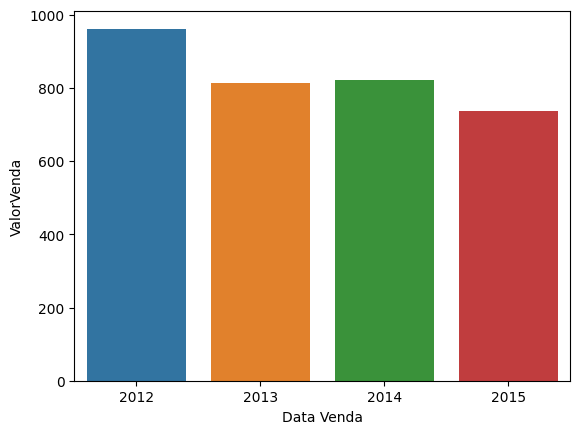

In [61]:
#rng = pd.DataFrame()
#rng['date'] = pd.date_range('1/1/2011', periods=72, freq='H')
#rng['year'] = rng['date'].dt.year

sns.barplot(data = dados,y="ValorVenda", x= dados['Data Venda'].dt.year, orient='v', errorbar=None)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Segmento', ylabel='ValorVenda'>

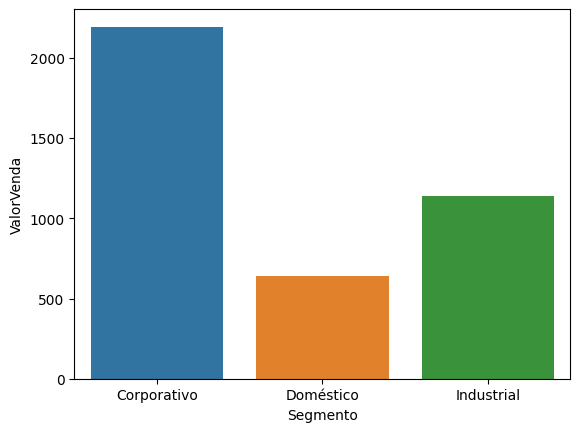

In [62]:
sns.barplot(data = dados,y="ValorVenda", x="Segmento",orient='v', errorbar=None)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


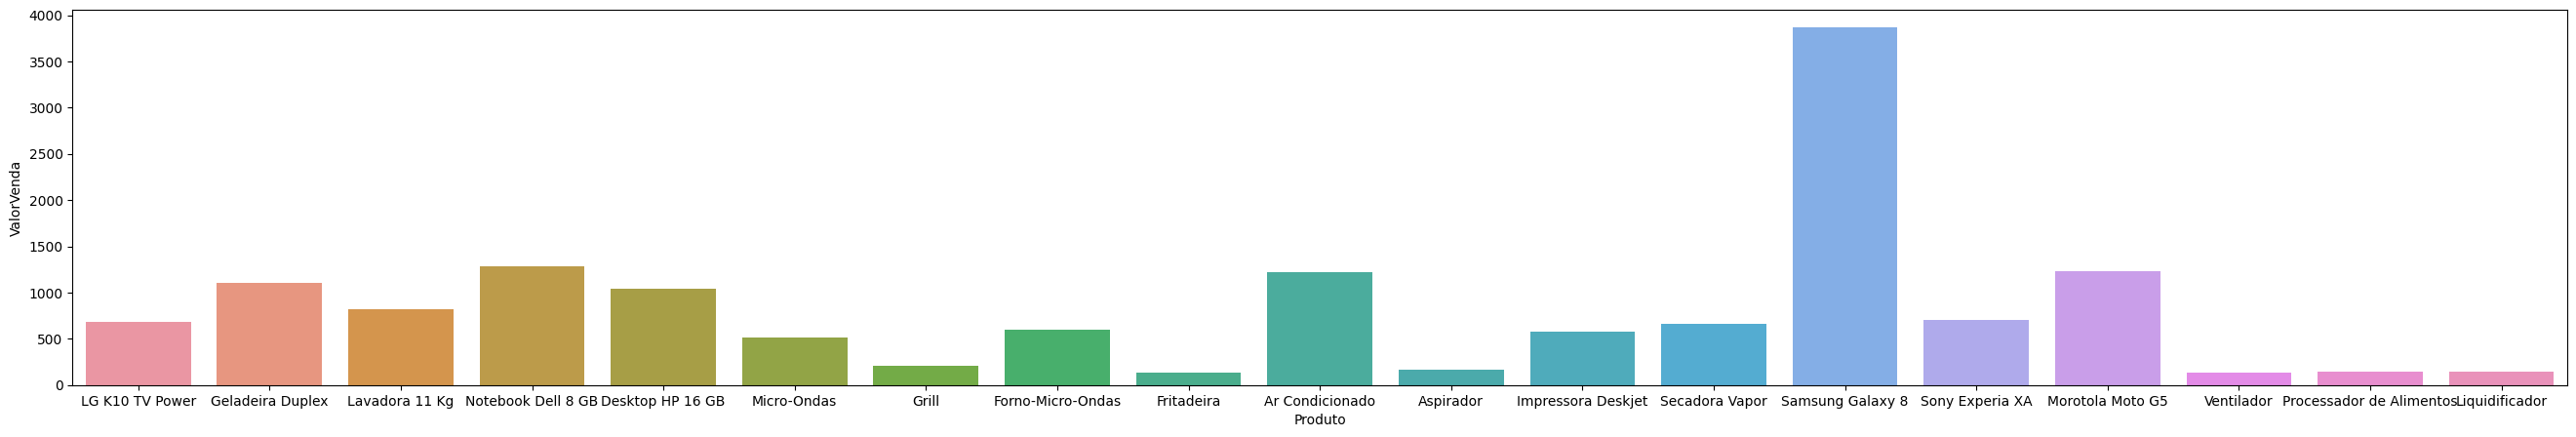

In [63]:
figura = sns.barplot(data = dados,y="ValorVenda", x="Produto",orient='v', errorbar=None)
figura.figure.set_size_inches(33, 5)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


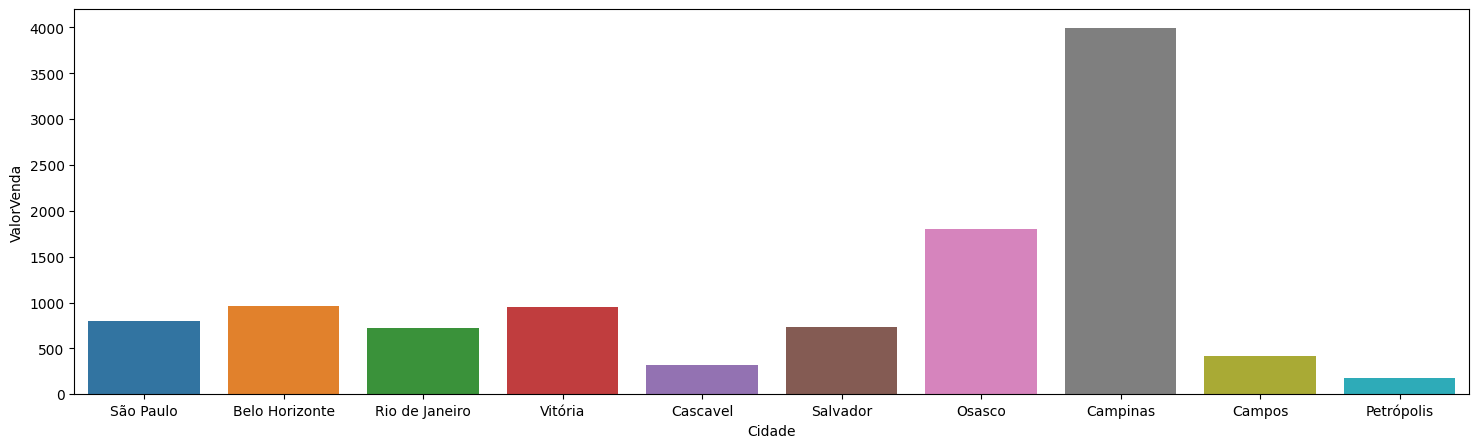

In [64]:
figura = sns.barplot(data = dados,y="ValorVenda", x="Cidade",orient='v', errorbar=None)
figura.figure.set_size_inches(18, 5)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


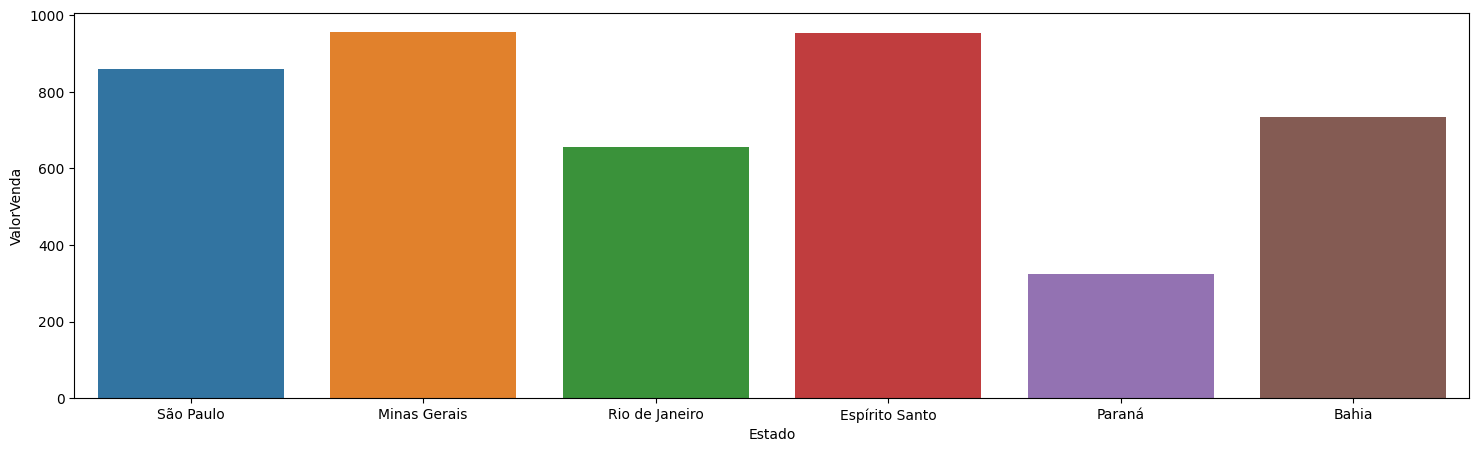

In [65]:
figura = sns.barplot(data = dados,y="ValorVenda", x="Estado",orient='v', errorbar=None)
figura.figure.set_size_inches(18, 5)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


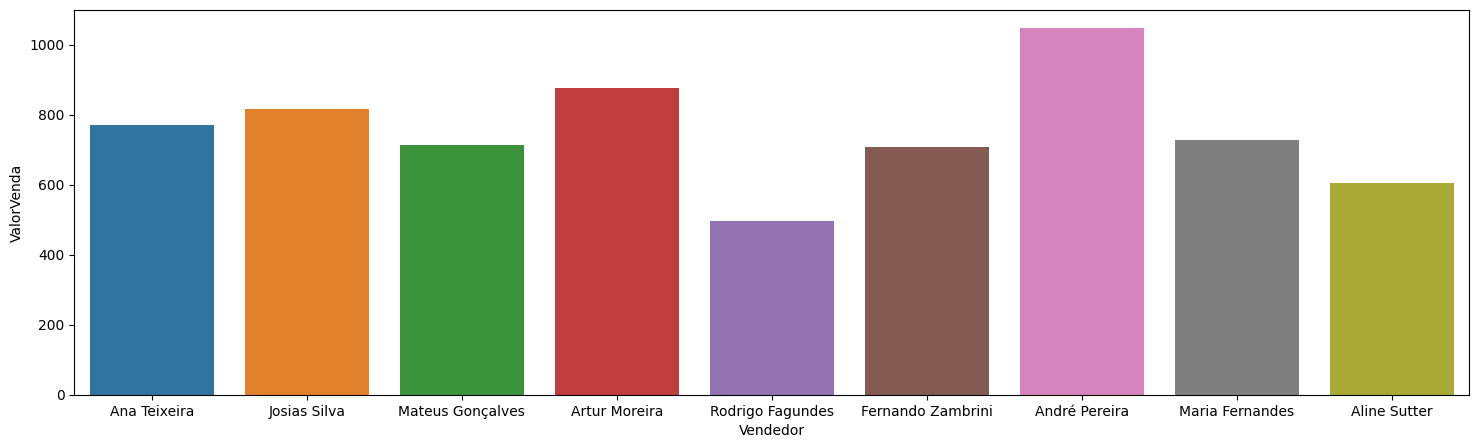

In [66]:
figura = sns.barplot(data = dados,y="ValorVenda", x="Vendedor",orient='v', errorbar=None)
figura.figure.set_size_inches(18, 5)

Grafico de linha Data x ValorVenda

In [69]:
#cria um novo data frame utilizando as colunas Data Venda e ValorVenda e apos isso classifica o data frame com base na coluna Data Venda
base = dados[['Data Venda', 'ValorVenda']].sort_values('Data Venda')
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 63 to 345
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data Venda  457 non-null    datetime64[ns]
 1   ValorVenda  457 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.7 KB


In [70]:
#agrupamento
base = base.groupby('Data Venda').sum()

In [72]:
base.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2012-01-01 to 2015-12-02
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ValorVenda  108 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [73]:
x = base.index
y = base['ValorVenda']

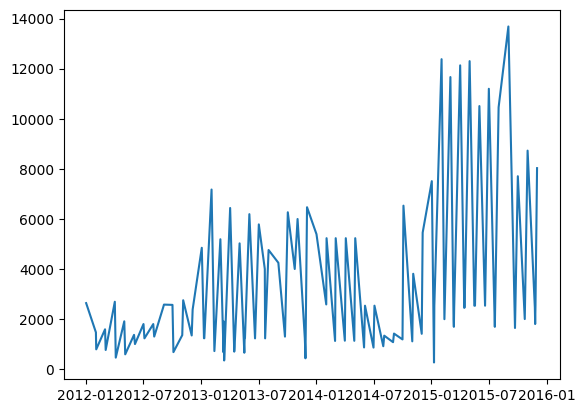

In [74]:
plt.plot(x,y)